
**Multiple Linear Regression**

We will see how multiple input variables together influence the output variable, while also learning how the calculations differ from that of Simple LR model. We will also build a regression model using Python. At last, we will go deeper into Linear Regression and will learn things like Multicollinearity, Hypothesis Testing, Feature Selection, and much more.

In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

**House Prices**

Created based on the Exercise Sheet.

In [ ]:
house_prices = {'Quality': [5, 3, 5, 6], 'Condition':[9, 4, 6, 8], 'Bedrooms': [3, 4, 1, 3], 'Price': [138, 147, 222, 282]}
data = pd.DataFrame(house_prices, columns = ['Quality', 'Condition', 'Bedrooms', 'Price'])
data.head()

,Quality,Condition,Bedrooms,Price
0,5,9,3,138
1,3,4,4,147
2,5,6,1,222
3,6,8,3,282


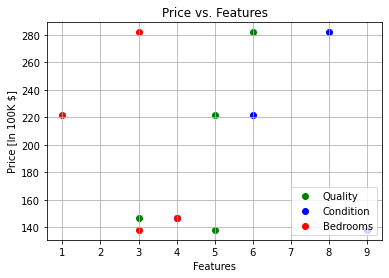

In [ ]:
plt.scatter(data.Quality, data.Price, color='green', label='Quality', alpha=1)
plt.scatter(data.Condition, data.Price, color='blue', label='Condition', alpha=1)
plt.scatter(data.Bedrooms, data.Price, color='red', label='Bedrooms', alpha=1)

plt.legend(loc="lower right")
plt.title("Price vs. Features")
plt.xlabel("Features")
plt.ylabel("Price [In 100K $]")
plt.grid()
plt.show()

**Mathematically, general Linear Regression model can be expressed as:**
$$\begin{align} Y= β_0+ β_1 X_1+ β_2 X_2+⋯+ β_p X_p \end{align}$$

Here, Y is the output variable, and X terms are the corresponding input variables.The first β term (βo) is the intercept constant and is the value of Y in absence of all predictors (i.e when all X terms are 0).

Finding the values of these constants(β) is what regression model does by minimizing the error function and fitting the best line or hyperplane (depending on the number of input variables). This is done by minimizing the Residual Sum of Squares (RSS), which is obtained by squaring the differences between actual and predicted outcomes.
$$\begin{align} RSS=∑_i^n(y_i-y ̂_i )^2 \end{align}$$

Because this method finds the least sum of squares, it is also known as the **Ordinary Least Squares (OLS)** method.

There are two primary ways to implement the OLS algorithm: **Scikit Learn** and **Statsmodels**.

**SciKit Learn:**

Just import the Linear Regression module from the Sklearn package and fit the model on the data. This method is pretty straightforward and you can see how to use it below.

In [ ]:
from sklearn.linear_model import LinearRegression
sk_model = LinearRegression()
sk_model.fit(data.drop('Price', axis=1), data.Price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print("Intercept: ", sk_model.intercept_)
print("Coefficients: ", sk_model.coef_)

Intercept:  -77.11764705882348
Coefficients:  [104.11764706 -39.88235294  17.82352941]


**Statsmodels**

Another way is to use the Statsmodels package to implement OLS. Statsmodels is a Python package that allows performing various statistical tests on the data. We will use it here because it will be helpful for us later as well.

In [ ]:
# Importing statsmodels
import statsmodels.formula.api as sm

# Fitting the OLS on data
model = sm.ols('Price ~ Quality + Condition + Bedrooms', data).fit()
print(model.params)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Intercept    -77.117647
Quality      104.117647
Condition    -39.882353
Bedrooms      17.823529
dtype: float64


These results can be interpreted as follows:

If we fix the ratings for Quality and Condition, then increasing the number of Bedrooms by 1 will lead to an increase in Price by around 17.8K $. And so on for the other two.

In [ ]:
# Simple Linear regression for sales vs newspaper
model_npaper = sm.ols('Price ~ Condition', data).fit()
print(model_npaper.params)

Intercept    155.033898
Condition      6.254237
dtype: float64


**This is explained by Multicollinearity**

Let's plot and observe the correlations among the variables:

In [ ]:
data.corr()

,Quality,Condition,Bedrooms,Price
Quality,1.000000,0.806419,-0.473684,0.722751
Condition,0.806419,1.000000,-0.149337,0.204243
Bedrooms,-0.473684,-0.149337,1.000000,-0.389173
Price,0.722751,0.204243,-0.389173,1.000000


**Plotting the heatmap to visualize the Correlation**

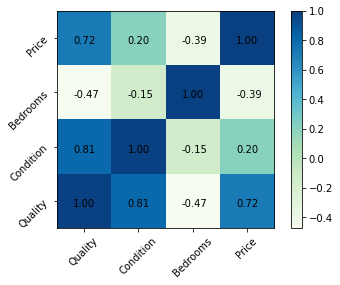

In [ ]:
# Plotting correlation heatmap
plt.ylim(-.5,3.5)
plt.imshow(data.corr(), cmap=plt.cm.GnBu, interpolation='nearest',data=True)
plt.colorbar()
tick_marks = [i for i in range(len(data.columns))]
plt.xticks(tick_marks, data.columns, rotation=45)
plt.yticks(tick_marks, data.columns, rotation=45)

# Putting annotations
for i in range(len(data.columns)):
    for j in range(len(data.columns)):
        text = '%.2f'%(data.corr().iloc[i,j])
        plt.text(i-0.2,j-0.1,text)

In [ ]:
print(model.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     nan      
Dependent Variable: Price            AIC:                -219.6252
Date:               2020-11-14 17:23 BIC:                -222.0801
No. Observations:   4                Log-Likelihood:     113.81   
Df Model:           3                F-statistic:        0.000    
Df Residuals:       0                Prob (F-statistic): nan      
R-squared:          1.000            Scale:              inf      
--------------------------------------------------------------------
              Coef.     Std.Err.      t      P>|t|   [0.025   0.975]
--------------------------------------------------------------------
Intercept    -77.1176        inf   -0.0000     nan      nan      nan
Quality      104.1176        inf    0.0000     nan      nan      nan
Condition    -39.8824        inf   -0.0000     nan      nan      nan
Bedrooms      17.8235        inf    0.0000     nan      nan      nan

/usr/local/lib/python3.6/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


In [ ]:
# Defining the function to evaluate amodel
def evaluateModel (model):
    print("RSS = ", ((data.Price - model.predict())**2).sum())
    print("R2 = ", model.rsquared)

In [ ]:
# For Quality
model_Quality = sm.ols('Price ~ Quality', data).fit()
print("model_Quality")
evaluateModel(model_Quality)
print("------------")

# For Condition
model_Condition = sm.ols('Price ~ Condition', data).fit()
print("model_Condition")
evaluateModel(model_Condition)
print("------------")

# For Bedrooms
model_Bedrooms = sm.ols('Price ~ Bedrooms', data).fit()
print("model_Bedrooms")
evaluateModel(model_Bedrooms)
print("------------")

model_Quality
RSS =  6606.0
R2 =  0.5223686351065561
------------
model_Condition
RSS =  13253.796610169487
R2 =  0.04171526416358573
------------
model_Bedrooms
RSS =  11736.0
R2 =  0.15145599479420857
------------


In [ ]:
# For Quality and Condition
model_Quality_Condition = sm.ols('Price ~ Quality + Condition', data).fit()
print("model_Quality_Condition")
evaluateModel(model_Quality_Condition)
print("------------")

# For Quality and Bedrooms
model_Quality_Bedrooms = sm.ols('Price ~ Quality + Bedrooms', data).fit()
print("model_Quality_Bedrooms")
evaluateModel(model_Quality_Bedrooms)
print("------------")

model_Quality_Condition
RSS =  936.8265306122402
R2 =  0.9322649508803037
------------
model_Quality_Bedrooms
RSS =  6566.914285714291
R2 =  0.5251946361756021
------------


In [ ]:
# For Quality and Condition and Bedrooms
model_all = sm.ols('Price ~ Quality + Condition + Bedrooms', data).fit()
print("model_all")
evaluateModel(model_all)
print("------------")

model_all
RSS =  4.52364397489937e-26
R2 =  1.0
------------
